In [50]:
# MERGE AND SAVE log before first scaling

from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

LENSES_PATH = "lenses/lens_image_"
OUT_PATH = "/run/media/toyonagar/Lexar/out/out"
#MERGED_PATH = "/run/media/toyonagar/Lexar/merged/merged_"
MERGED_PATH = "/run/media/toyonagar/Lexar/log_set/logged/logged_"
hm_lenses = int(input("How many lenses do you want to merge with associated cutouts? "))

alpha = [0.20, 0.14, 0.08, 0.02]
#alpha = [1]

def normalize( all_cutouts, all_lenses, hm_lenses): #only for 1 color channel. Scale both (0,1)
    bad_images = []
    for lens_number in range(hm_lenses):
        try:
            #scale the lenses
            for i in range(len(alpha)): #array axis 0 = [..all one weight.., all another weight..]
                tmp_lens = all_lenses[lens_number + hm_lenses*i][0].reshape(-1,)  
                tmp_lens = np.log10(tmp_lens+1)
                tmp_lens = minmax_scale(tmp_lens, feature_range = (0, 1*alpha[i]))     
                
                all_lenses[lens_number + hm_lenses*i][0] = tmp_lens.reshape(all_lenses.shape[2],all_lenses.shape[2])
            
            
                #scale the cutouts
                tmp_lens2 = all_cutouts[lens_number + hm_lenses*i][0].reshape(-1,)
                tmp_lens2 = np.log10(tmp_lens2+1)
                tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
                
                all_cutouts[lens_number + hm_lenses*i][0] = tmp_lens2.reshape(all_cutouts.shape[2],all_cutouts.shape[2])

        except:
            bad_images.append(lens_number)
            print ("image contains NaN")
    
    hm_lenses -=len(bad_images)        
    all_lenses = np.delete(all_lenses,bad_images, axis=0)
    all_cutouts = np.delete(all_cutouts,bad_images, axis=0)

    
 
    return all_cutouts, all_lenses
    

def load_images(sample_num): #NEED TO LOAD THE SAME IMAGE FOUR TIMES INTO all_cutouts
    pass
   
    lens = fits.open(LENSES_PATH+str(sample_num)+".fits")[0].data #PATH will  run dir
    

    cutout = fits.open(OUT_PATH+str(sample_num)+".fits")[0].data 

    cutout = cutout.reshape(1,cutout.shape[0],cutout.shape[1])
    lens = lens.reshape(1,lens.shape[0],lens.shape[1])
  
    return cutout, lens
    

def save_images(hm_lenses, merged): #unused
    
    for image in range(len(merged)):
        fits.writeto(MERGED_PATH + str(image)+'.fits', merged[image], overwrite =True) 
        
def save_image(image_number, merged):
    fits.writeto(MERGED_PATH + str(image_number)+'.fits', merged, overwrite =True) 

def sum_images(all_cutouts, all_lenses, hm_lenses): #only sums in 2D, no color channel,need to save periodically
    merged = []
    for image_number in range(hm_lenses*len(alpha)):    
        try:
            #sum
            summed=np.add(all_cutouts[image_number][0], all_lenses[image_number][0])
            #renormalize
            print image_number
            tmp_image = summed.reshape(-1,)
            tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
            summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
            #save
            if summed.mean()==0:
                hm_lenses -=1
                print( "image is blank")
                continue
            save_image(image_number, summed)
            merged.append(summed)
        except:
            hm_lenses -=1
            
            print("failed at adding images together, re-normalizing, and saving "+str(image_number))
            
    return merged




all_cutouts = np.zeros((hm_lenses*len(alpha),1,100,100))
all_lenses = np.zeros((hm_lenses*len(alpha),1,100,100))

bad_images = [] #keep track of and remove bad images later

for image in range(hm_lenses):
    
    try:
        #load each image into 4 spots in each respective array
        for weight in range(len(alpha)):
            all_cutouts[image + hm_lenses*weight], all_lenses[image+hm_lenses*weight] = load_images(image)
            #all_cutouts[image], all_lenses[image] = load_lenses(image)

    except:
        bad_images.append(image)
        print("couldnt find image: " +str(image))
        
hm_lenses -=len(bad_images)        
all_cutouts = np.delete(all_cutouts,bad_images, axis=0)
all_lenses = np.delete(all_lenses,bad_images, axis=0)
    
print("images loaded") 

all_cutouts, all_lenses = normalize(all_cutouts, all_lenses, hm_lenses)

print("images normalized")   
    
merged = sum_images(all_cutouts, all_lenses, hm_lenses)  

print("images merged, re-normalized, and saved") 


        
#save_images(hm_lenses, merged)
#print(" merged images saved ")

How many lenses do you want to merge with associated cutouts? 400
couldnt find image: 2
couldnt find image: 14
couldnt find image: 15
couldnt find image: 18
couldnt find image: 19
couldnt find image: 20
couldnt find image: 22
couldnt find image: 23
couldnt find image: 25
couldnt find image: 29
couldnt find image: 30
couldnt find image: 31
couldnt find image: 35
couldnt find image: 37
couldnt find image: 38
couldnt find image: 39
couldnt find image: 42
couldnt find image: 46
couldnt find image: 49
couldnt find image: 51
couldnt find image: 56
couldnt find image: 61
couldnt find image: 63
couldnt find image: 65
couldnt find image: 66
couldnt find image: 67
couldnt find image: 69
couldnt find image: 71
couldnt find image: 75
couldnt find image: 77
couldnt find image: 83
couldnt find image: 84
couldnt find image: 88
couldnt find image: 91
couldnt find image: 94
couldnt find image: 99
couldnt find image: 103
couldnt find image: 109
couldnt find image: 112
couldnt find image: 113
couldnt fin

549
image is blank
550
551
552
failed at adding images together, re-normalizing, and saving 552
553
554
image is blank
555
556
557
failed at adding images together, re-normalizing, and saving 557
558
559
560
image is blank
561
562
563
failed at adding images together, re-normalizing, and saving 563
564
565
566
567
568
failed at adding images together, re-normalizing, and saving 568
569
570
571
image is blank
572
573
failed at adding images together, re-normalizing, and saving 573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
image is blank
588
image is blank
589
590
591
592
593
594
595
596
597
failed at adding images together, re-normalizing, and saving 597
598
image is blank
599
600
601
602
603
604
605
606
image is blank
607
image is blank
608
609
610
611
image is blank
612
613
614
image is blank
615
failed at adding images together, re-normalizing, and saving 615
616
617
618
failed at adding images together, re-normalizing, and saving 618
619
620
621
622
image is blank
623


In [199]:
# MERGE AND SAVE LOG AFTER first scaling

from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

LENSES_PATH = "lenses/lens_image_"
OUT_PATH = "/run/media/toyonagar/Lexar/out/out"
#MERGED_PATH = "/run/media/toyonagar/Lexar/merged/merged_"
MERGED_PATH = "/run/media/toyonagar/Lexar/logged/logged_"
hm_lenses = int(input("How many lenses do you want to merge with associated cutouts? "))

alpha = [0.20, 0.14, 0.08, 0.02]
#alpha = [1]

def normalize( all_cutouts, all_lenses, hm_lenses): #only for 1 color channel. Scale both (0,1)
    bad_images = []
    for lens_number in range(hm_lenses):
        try:
            #scale the lenses
            for i in range(len(alpha)): #array axis 0 = [..all one weight.., all another weight..]
                tmp_lens = all_lenses[lens_number + hm_lenses*i][0].reshape(-1,)  
                
                tmp_lens = minmax_scale(tmp_lens, feature_range = (0, 1*alpha[i]))     
                tmp_lens = np.log10(tmp_lens+1)
                all_lenses[lens_number + hm_lenses*i][0] = tmp_lens.reshape(all_lenses.shape[2],all_lenses.shape[2])
            
            
                #scale the cutouts
                tmp_lens2 = all_cutouts[lens_number + hm_lenses*i][0].reshape(-1,)
                tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
                tmp_lens2 = np.log10(tmp_lens2+1)

                all_cutouts[lens_number + hm_lenses*i][0] = tmp_lens2.reshape(all_cutouts.shape[2],all_cutouts.shape[2])

        except:
            bad_images.append(lens_number)
            print ("image contains NaN")
    
    hm_lenses -=len(bad_images)        
    all_lenses = np.delete(all_lenses,bad_images, axis=0)
    all_cutouts = np.delete(all_cutouts,bad_images, axis=0)

    
 
    return all_cutouts, all_lenses
    

def load_images(sample_num): #NEED TO LOAD THE SAME IMAGE FOUR TIMES INTO all_cutouts
    pass
   
    lens = fits.open(LENSES_PATH+str(sample_num)+".fits")[0].data #PATH will  run dir
    

    cutout = fits.open(OUT_PATH+str(sample_num)+".fits")[0].data 

    cutout = cutout.reshape(1,cutout.shape[0],cutout.shape[1])
    lens = lens.reshape(1,lens.shape[0],lens.shape[1])
  
    return cutout, lens
    

def save_images(hm_lenses, merged): #unused
    
    for image in range(len(merged)):
        fits.writeto(MERGED_PATH + str(image)+'.fits', merged[image], overwrite =True) 
        
def save_image(image_number, merged):
    fits.writeto(MERGED_PATH + str(image_number)+'.fits', merged, overwrite =True) 

def sum_images(all_cutouts, all_lenses, hm_lenses): #only sums in 2D, no color channel,need to save periodically
    merged = []
    for image_number in range(hm_lenses*len(alpha)):    
        try:
            #sum
            summed=np.add(all_cutouts[image_number][0], all_lenses[image_number][0])
            #renormalize
            print image_number
            tmp_image = summed.reshape(-1,)
            tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
            summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
            #save
            if summed.mean()==0.0:
                hm_lenses -=1
                print( "image is blank")
                continue
            save_image(image_number, summed)
            merged.append(summed)
        except:
            hm_lenses -=1
            
            print("failed at adding images together, re-normalizing, and saving "+str(image_number))
            
    return merged




all_cutouts = np.zeros((hm_lenses*len(alpha),1,100,100))
all_lenses = np.zeros((hm_lenses*len(alpha),1,100,100))

bad_images = [] #keep track of and remove bad images later

for image in range(hm_lenses):
    
    try:
        #load each image into 4 spots in each respective array
        for weight in range(len(alpha)):
            all_cutouts[image + hm_lenses*weight], all_lenses[image+hm_lenses*weight] = load_images(image)
            #all_cutouts[image], all_lenses[image] = load_lenses(image)

    except:
        bad_images.append(image)
        print("couldnt find image: " +str(image))
        
hm_lenses -=len(bad_images)        
all_cutouts = np.delete(all_cutouts,bad_images, axis=0)
all_lenses = np.delete(all_lenses,bad_images, axis=0)
    
print("images loaded") 

all_cutouts, all_lenses = normalize(all_cutouts, all_lenses, hm_lenses)

print("images normalized")   
    
merged2 = sum_images(all_cutouts, all_lenses, hm_lenses)  

print("images merged, re-normalized, and saved") 


        
#save_images(hm_lenses, merged)
#print(" merged images saved ")

How many lenses do you want to merge with associated cutouts? 5000
couldnt find image: 2
couldnt find image: 14
couldnt find image: 15
couldnt find image: 18
couldnt find image: 19
couldnt find image: 20
couldnt find image: 22
couldnt find image: 23
couldnt find image: 25
couldnt find image: 29
couldnt find image: 30
couldnt find image: 31
couldnt find image: 35
couldnt find image: 37
couldnt find image: 38
couldnt find image: 39
couldnt find image: 42
couldnt find image: 46
couldnt find image: 49
couldnt find image: 51
couldnt find image: 56
couldnt find image: 61
couldnt find image: 63
couldnt find image: 65
couldnt find image: 66
couldnt find image: 67
couldnt find image: 69
couldnt find image: 71
couldnt find image: 75
couldnt find image: 77
couldnt find image: 83
couldnt find image: 84
couldnt find image: 88
couldnt find image: 91
couldnt find image: 94
couldnt find image: 99
couldnt find image: 103
couldnt find image: 109
couldnt find image: 112
couldnt find image: 113
couldnt fi

couldnt find image: 1477
couldnt find image: 1478
couldnt find image: 1479
couldnt find image: 1480
couldnt find image: 1481
couldnt find image: 1482
couldnt find image: 1483
couldnt find image: 1484
couldnt find image: 1485
couldnt find image: 1486
couldnt find image: 1487
couldnt find image: 1488
couldnt find image: 1489
couldnt find image: 1490
couldnt find image: 1491
couldnt find image: 1492
couldnt find image: 1493
couldnt find image: 1494
couldnt find image: 1495
couldnt find image: 1496
couldnt find image: 1497
couldnt find image: 1498
couldnt find image: 1499
couldnt find image: 1500
couldnt find image: 1501
couldnt find image: 1502
couldnt find image: 1503
couldnt find image: 1504
couldnt find image: 1505
couldnt find image: 1506
couldnt find image: 1507
couldnt find image: 1508
couldnt find image: 1509
couldnt find image: 1510
couldnt find image: 1511
couldnt find image: 1512
couldnt find image: 1513
couldnt find image: 1514
couldnt find image: 1515
couldnt find image: 1516


couldnt find image: 2439
couldnt find image: 2440
couldnt find image: 2441
couldnt find image: 2442
couldnt find image: 2443
couldnt find image: 2444
couldnt find image: 2445
couldnt find image: 2446
couldnt find image: 2447
couldnt find image: 2448
couldnt find image: 2449
couldnt find image: 2450
couldnt find image: 2451
couldnt find image: 2452
couldnt find image: 2453
couldnt find image: 2454
couldnt find image: 2455
couldnt find image: 2456
couldnt find image: 2457
couldnt find image: 2458
couldnt find image: 2459
couldnt find image: 2460
couldnt find image: 2461
couldnt find image: 2462
couldnt find image: 2463
couldnt find image: 2464
couldnt find image: 2465
couldnt find image: 2466
couldnt find image: 2467
couldnt find image: 2468
couldnt find image: 2469
couldnt find image: 2470
couldnt find image: 2471
couldnt find image: 2472
couldnt find image: 2473
couldnt find image: 2474
couldnt find image: 2475
couldnt find image: 2476
couldnt find image: 2477
couldnt find image: 2478


couldnt find image: 3363
couldnt find image: 3364
couldnt find image: 3365
couldnt find image: 3366
couldnt find image: 3367
couldnt find image: 3368
couldnt find image: 3369
couldnt find image: 3370
couldnt find image: 3371
couldnt find image: 3372
couldnt find image: 3373
couldnt find image: 3374
couldnt find image: 3375
couldnt find image: 3376
couldnt find image: 3377
couldnt find image: 3378
couldnt find image: 3379
couldnt find image: 3380
couldnt find image: 3381
couldnt find image: 3382
couldnt find image: 3383
couldnt find image: 3384
couldnt find image: 3385
couldnt find image: 3386
couldnt find image: 3387
couldnt find image: 3388
couldnt find image: 3389
couldnt find image: 3390
couldnt find image: 3391
couldnt find image: 3392
couldnt find image: 3393
couldnt find image: 3394
couldnt find image: 3395
couldnt find image: 3396
couldnt find image: 3397
couldnt find image: 3398
couldnt find image: 3399
couldnt find image: 3400
couldnt find image: 3401
couldnt find image: 3402


couldnt find image: 4279
couldnt find image: 4280
couldnt find image: 4281
couldnt find image: 4282
couldnt find image: 4283
couldnt find image: 4284
couldnt find image: 4285
couldnt find image: 4286
couldnt find image: 4287
couldnt find image: 4288
couldnt find image: 4289
couldnt find image: 4290
couldnt find image: 4291
couldnt find image: 4292
couldnt find image: 4293
couldnt find image: 4294
couldnt find image: 4295
couldnt find image: 4296
couldnt find image: 4297
couldnt find image: 4298
couldnt find image: 4299
couldnt find image: 4300
couldnt find image: 4301
couldnt find image: 4302
couldnt find image: 4303
couldnt find image: 4304
couldnt find image: 4305
couldnt find image: 4306
couldnt find image: 4307
couldnt find image: 4308
couldnt find image: 4309
couldnt find image: 4310
couldnt find image: 4311
couldnt find image: 4312
couldnt find image: 4313
couldnt find image: 4314
couldnt find image: 4315
couldnt find image: 4316
couldnt find image: 4317
couldnt find image: 4318


images loaded
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains NaN
image contains Na

1023
image is blank
1024
image is blank
1025
image is blank
1026
image is blank
1027
image is blank
1028
image is blank
1029
image is blank
1030
image is blank
1031
image is blank
1032
image is blank
1033
image is blank
1034
image is blank
1035
image is blank
1036
image is blank
1037
image is blank
1038
image is blank
1039
image is blank
1040
image is blank
1041
image is blank
1042
image is blank
1043
image is blank
1044
image is blank
1045
image is blank
1046
image is blank
1047
image is blank
1048
image is blank
1049
image is blank
1050
image is blank
1051
image is blank
1052
image is blank
1053
image is blank
1054
image is blank
1055
image is blank
1056
image is blank
1057
image is blank
1058
image is blank
1059
image is blank
1060
image is blank
1061
image is blank
1062
image is blank
1063
image is blank
1064
image is blank
1065
image is blank
1066
image is blank
1067
image is blank
1068
image is blank
1069
image is blank
1070
image is blank
1071
image is blank
1072
image is blank


image is blank
1476
image is blank
1477
image is blank
1478
image is blank
1479
image is blank
1480
image is blank
1481
image is blank
1482
image is blank
1483
image is blank
1484
image is blank
1485
image is blank
1486
image is blank
1487
image is blank
1488
image is blank
1489
image is blank
1490
image is blank
1491
image is blank
1492
image is blank
1493
image is blank
1494
image is blank
1495
image is blank
1496
image is blank
1497
image is blank
1498
image is blank
1499
image is blank
1500
image is blank
1501
image is blank
1502
image is blank
1503
image is blank
1504
image is blank
1505
image is blank
1506
image is blank
1507
image is blank
1508
image is blank
1509
image is blank
1510
image is blank
1511
image is blank
1512
image is blank
1513
image is blank
1514
image is blank
1515
image is blank
1516
image is blank
1517
image is blank
1518
image is blank
1519
image is blank
1520
image is blank
1521
image is blank
1522
image is blank
1523
image is blank
1524
image is blank
1525


(array([ 517365.,  316875.,  408905.,  317485.,  162900.,   61918.,
          18162.,    4416.,    1353.,     621.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

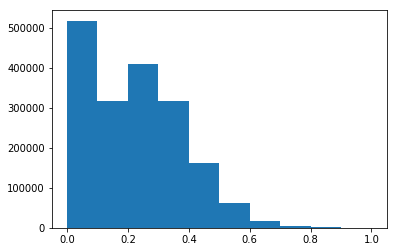

In [129]:
plt.hist(np.array(merged).reshape(-1,))

(array([ 448441.,  259941.,  294852.,  362074.,  258963.,  128903.,
          43522.,   10289.,    2228.,     787.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

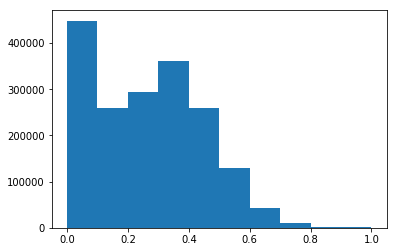

In [130]:
plt.hist(np.array(merged2).reshape(-1,))

In [1]:
plt.imshow(merged[1349])

NameError: name 'plt' is not defined

In [161]:
#import all the data
import numpy as np
import os 
from astropy.io import fits

NEG_PATH = "/run/media/toyonagar/Lexar/log_set/log_negatives/out/"
#POS_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/non-neg-set/merged/"
POS_PATH = "/run/media/toyonagar/Lexar/log_set/logged/"
set_size =1567*2 #includes both pos and neg samples

ims = np.ones((set_size, 1, 100, 100))
y = np.ones((set_size,1))

#load the negatives into even numbered indices (including 0)
count =0
for filename in os.listdir(NEG_PATH):
    if filename.endswith(".fits") and count<set_size/2: 
        ims[count*2] = fits.open(NEG_PATH+filename)[0].data
        y[count*2] = np.array([0])
        count+=1
    
    
#load the positives into odd numered indices
count =0
for filename in os.listdir(POS_PATH):
    if filename.endswith(".fits") and count<set_size/2: 
        ims[count*2+1] = fits.open(POS_PATH+filename)[0].data
        y[count*2+1] = np.array([1])
        count+=1
        


In [163]:

NEG_PATH = "/run/media/toyonagar/Lexar/log_set/log_negatives/out/"
#POS_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/non-neg-set/merged/"
POS_PATH = "/run/media/toyonagar/Lexar/log_set/logged/"
set_size =1567*2 #includes both pos and neg samples

neg = np.ones((set_size/2, 1, 100, 100))


#load the negatives into even numbered indices (including 0)
count =0
for filename in os.listdir(NEG_PATH):
    if filename.endswith(".fits") and count<set_size/2: 
        neg[count] = fits.open(NEG_PATH+filename)[0].data
        count+=1

        

pos = np.ones((set_size/2, 1, 100, 100))


#load the negatives into even numbered indices (including 0)
count =0
for filename in os.listdir(POS_PATH):
    if filename.endswith(".fits") and count<set_size/2: 
        pos[count] = fits.open(POS_PATH+filename)[0].data
        count+=1
          

In [164]:
pos.mean(), neg.mean()

(0.16844107943985778, 0.22379331309738723)

In [145]:
fits.open('/run/media/toyonagar/Lexar/log_set/logged/logged_0.fits')[0].data.mean()

0.25157698051045857

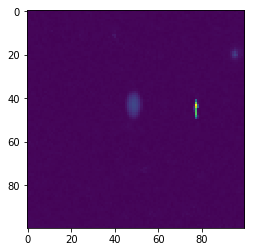

In [173]:
import matplotlib.pyplot as plt
plt.imshow(ims[79][0])

In [95]:
len(ims)

1000